In [1]:
import arviz as az
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme('paper', 'white', font='helvetica', font_scale=1.25, palette='tab10')

import os.path as op
from risk_experiment.cogmodels.fit_model import build_model, get_data
bids_folder = '/data/ds-risk'

/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
def load(model_label, session, roi=None, bids_folder='/data/ds-risk'):
    data = get_data(model_label, session, bids_folder, roi)
    model = build_model(model_label, data, roi)
    idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'ses-{session}_model-{model_label}_trace.netcdf'))

    return data, model, idata

In [3]:
model_label = 'pupil_n1_pre'
session = '3t2'
bids_folder = '/data/ds-risk'

cm = 1/2.54  # centimeters in inches

In [4]:
data, model, idata = load(model_label, session)

100%|██████████| 30/30 [00:01<00:00, 26.77it/s]


In [5]:
def plot_parameters(idata, parameter, legend=True, key='pupil', plot_title=False):

    if parameter == 'evidence_sd':
        pars = pd.concat((idata.posterior['n1_evidence_sd_mu'].to_dataframe().xs(key, 0, -1), (idata.posterior['n2_evidence_sd_mu'].to_dataframe().xs(key, 0, -1))), axis=1)
    elif parameter == 'prior_mu':
        pars = pd.concat((idata.posterior['risky_prior_mu_mu'].to_dataframe().xs(key, 0, -1), (idata.posterior['safe_prior_mu_mu'].to_dataframe().xs(key, 0, -1))), axis=1)
    elif parameter == 'prior_std':
        pars = pd.concat((idata.posterior['risky_prior_std_mu'].to_dataframe().xs(key, 0, -1), (idata.posterior['safe_prior_std_mu'].to_dataframe().xs(key, 0, -1))), axis=1)
    
    pars.columns.name = 'parameter'
    pars = pars.stack().to_frame('value')

    hue_key = 'Option'
    
    if parameter == 'evidence_sd':
        pars['Option'] = pars.index.get_level_values('parameter').map({'n1_evidence_sd_mu':1, 'n2_evidence_sd_mu':2})
        palette = sns.color_palette()[4:]
        title = 'Evidence sd'
        hue_order = [1, 2]
    elif parameter == 'prior_mu':
        pars['Option'] = pars.index.get_level_values('parameter').map({'risky_prior_mu_mu':'Risky', 'safe_prior_mu_mu':'Safe'})
        palette = sns.color_palette('coolwarm', 4)
        palette = [palette[ix] for ix in [0, 3]]
        title = 'Prior mu'
        hue_order = ['Safe', 'Risky']
    elif parameter == 'prior_std':
        pars['Option'] = pars.index.get_level_values('parameter').map({'risky_prior_std_mu':'Risky', 'safe_prior_std_mu':'Safe'})
        palette = sns.color_palette('coolwarm', 4)
        palette = [palette[ix] for ix in [0, 3]]
        title = 'Prior std'
        hue_order = ['Safe', 'Risky']

    fac = sns.FacetGrid(pars.reset_index(), hue=hue_key, hue_order=hue_order, palette=palette, aspect=1.1, height=2.5)
    fac.map(sns.kdeplot, 'value', fill=True)
    fac.set(xlabel=None, ylabel=None, yticks=[])


    if plot_title:
        plt.title(title)
    # fac.add_legend()
    if legend:
        plt.legend(title=hue_key, loc='upper right')

    plt.axvline(0, c='k', ls='--')
    plt.gcf().set_size_inches(6.4*cm, 6.4*cm)


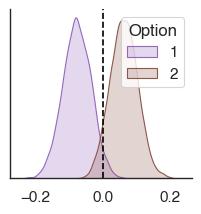

In [6]:
plot_parameters(idata, 'evidence_sd', legend=True)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-3t2_pupil_n1_pre_sd.pdf'), bbox_inches='tight')

In [7]:
(idata.posterior['n1_evidence_sd_mu'].to_dataframe().xs('pupil', 0, -1) > 0.0 ).mean(), (idata.posterior['n2_evidence_sd_mu'].to_dataframe().xs('pupil', 0, -1) < 0.0 ).mean()

(n1_evidence_sd_mu    0.034
 dtype: float64,
 n2_evidence_sd_mu    0.066667
 dtype: float64)

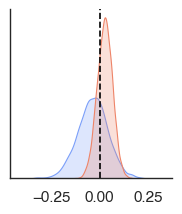

In [8]:
plot_parameters(idata, 'prior_mu', legend=False)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-3t2_pupil_n1_pre_prior_mu.pdf'), bbox_inches='tight')

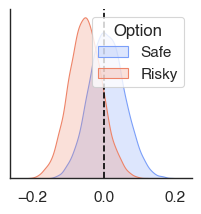

In [9]:
plot_parameters(idata, 'prior_std', legend=True)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-3t2_pupil_n1_pre_prior_std.pdf'), bbox_inches='tight')

In [10]:
# Post-n1

In [11]:
data, model, idata = load('pupil_n1_postpre', session)

100%|██████████| 30/30 [00:01<00:00, 26.78it/s]


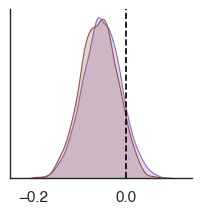

In [12]:
plot_parameters(idata, 'evidence_sd', legend=False)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-3t2_pupil_n1_prepost_sd.pdf'), bbox_inches='tight')

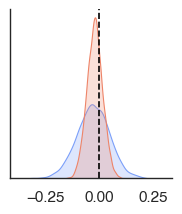

In [13]:
plot_parameters(idata, 'prior_mu', legend=False)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-3t2_pupil_n1_prepost_prior_mu.pdf'), bbox_inches='tight')

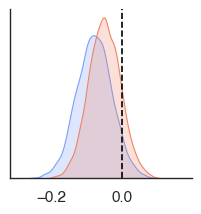

In [14]:
plot_parameters(idata, 'prior_std', legend=False)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-3t2_pupil_n1_prepost_prior_std.pdf'), bbox_inches='tight')

# n2 choice

In [15]:
data, model, idata = load('pupil_n2_choice', session)

100%|██████████| 30/30 [00:01<00:00, 25.78it/s]


In [16]:
(idata.posterior['n1_evidence_sd_mu'].to_dataframe().xs('pupil', 0, -1) < 0.0 ).mean(), (idata.posterior['n2_evidence_sd_mu'].to_dataframe().xs('pupil', 0, -1) < 0.0 ).mean()

(n1_evidence_sd_mu    0.004333
 dtype: float64,
 n2_evidence_sd_mu    0.009333
 dtype: float64)

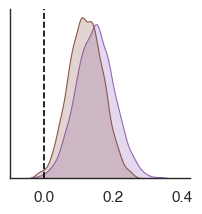

In [17]:
plot_parameters(idata, 'evidence_sd', legend=False)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-3t2_pupil_n2_choice_pre_sd.pdf'), bbox_inches='tight')

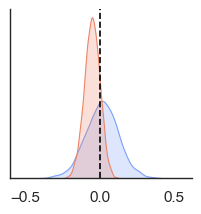

In [18]:
plot_parameters(idata, 'prior_mu', legend=False)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-3t2_pupil_n2_choice_pre_prior_mu.pdf'), bbox_inches='tight')

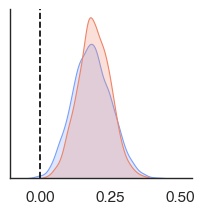

In [19]:
plot_parameters(idata, 'prior_std', legend=False)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-3t2_pupil_n2_choice_prior_std.pdf'), bbox_inches='tight')

In [20]:
(idata.posterior['risky_prior_std_mu'].to_dataframe().xs('pupil', 0, -1) < 0.0 ).mean(), (idata.posterior['safe_prior_std_mu'].to_dataframe().xs('pupil', 0, -1) < 0.0 ).mean()

(risky_prior_std_mu    0.000333
 dtype: float64,
 safe_prior_std_mu    0.003167
 dtype: float64)

In [21]:
import pymc as pm

In [22]:
pm.__version__

'4.2.0'